https://www.kaggle.com/code/javi23ruiz/eda-with-plotly-useful-conclusions

#### train.csv
- store_nbr: 제품이 판매된 매장을 식별
- family: 판매된 제품 유형을 식별
- sales: 특정 날짜에 특정 스토어에서 제품군의 총 판매량을 제공/ 제품을 분수 단위로 판매할 수 있으므로 분수 값도 가능(예: 칩 1봉지가 아닌 치즈 1.5kg).
- onpromotion: 지정된 날짜에 스토어에서 프로모션 중인 제품군의 총 품목 수

#### stores.csv
- cluster: 비슷한 집단(같은 지역에서 유사한 종류의 제품을 판매하는 스토어)
-  클러스터링을 사용하여 제품 종류, 지역, 판매 수 등 다양한 기준으로 스토어를 그룹화할 수 있습니다.

#### transactions.csv
- 일반적으로 판매와 상관없는 기타 거래(상품 교환, 환불, 기프트 카드 사용)를 제외한 순수한 판매 건수
- "transactions" 컬럼은 일반적으로 매출 증가 또는 감소의 주요 원인 중 하나로 사용되는 지표

#### oil.csv
- dcoilwtico: 원래 오일 가격
- "dcoilwtico"는 "Dated Brent"의 가격과 "West Texas Intermediate (WTI)"의 가격을 평균한 값
- dcoilwtico_interpolated: 보간(interpolate)으로 결측치가 처리된 가격 column

#### holidays_events.csv
- transferred: 공휴일이 휴무일로 이전되었는지 여부

### 컬럼 description




In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [3]:
train = pd.read_csv('datas/train.csv', index_col='id')
test = pd.read_csv('datas/test.csv')
stores = pd.read_csv('datas/stores.csv')
transactions = pd.read_csv('datas/transactions.csv')
oil = pd.read_csv('datas/oil.csv', index_col='date')
holidays_events = pd.read_csv('datas/holidays_events.csv')


In [150]:
train.head(1)

,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week
id,,,,,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0,2013,1,1,Tuesday


In [151]:
stores.head(1)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13


In [152]:
transactions.head(1)

,date,store_nbr,transactions
0,2013-01-01,25,770


In [4]:
train[(train['family']=='BOOKS')&(train['sales']!=0.0)]

,date,store_nbr,family,sales,onpromotion
id,,,,,
2447977,2016-10-08,45,BOOKS,1.0,0
2449759,2016-10-09,45,BOOKS,11.0,0
2451541,2016-10-10,45,BOOKS,14.0,0
2453125,2016-10-11,4,BOOKS,2.0,0
2453323,2016-10-11,45,BOOKS,10.0,0
...,...,...,...,...,...
2981191,2017-08-04,7,BOOKS,1.0,0
2984392,2017-08-06,46,BOOKS,1.0,0
2988319,2017-08-08,7,BOOKS,1.0,0


In [5]:
import numpy as np

unique_stores = np.sort(train[(train['family']=='BOOKS')&(train['sales']!=0.0)]['store_nbr'].unique())
print(unique_stores)

[ 1  2  3  4  5  6  7  8 23 24 25 26 27 37 38 41 42 44 45 46 47 48 49 50
 51 53]


In [6]:
train.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [7]:
store_cluster = stores.groupby(['type','cluster']).agg({'store_nbr': list}).reset_index()
store_cluster

,type,cluster,store_nbr
0,A,5,[44]
1,A,11,"[45, 49, 52]"
2,A,14,"[46, 47, 48, 50]"
3,A,17,[51]
4,B,6,"[9, 11, 20, 21, 34, 39]"
5,B,10,[31]
6,B,16,[18]
7,C,3,"[16, 30, 32, 33, 35, 40, 54]"
8,C,7,"[14, 22]"
9,C,12,[17]


In [8]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
train[(train['store_nbr']==25)&(train['date']=='2013-01-01')]

,date,store_nbr,family,sales,onpromotion
id,,,,,
561,2013-01-01,25,AUTOMOTIVE,0.000000,0
562,2013-01-01,25,BABY CARE,0.000000,0
563,2013-01-01,25,BEAUTY,2.000000,0
564,2013-01-01,25,BEVERAGES,810.000000,0
565,2013-01-01,25,BOOKS,0.000000,0
566,2013-01-01,25,BREAD/BAKERY,180.589000,0
567,2013-01-01,25,CELEBRATION,0.000000,0
568,2013-01-01,25,CLEANING,186.000000,0
569,2013-01-01,25,DAIRY,143.000000,0


In [10]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [88]:
transactions['date'].value_counts()

2017-08-15    54
2017-06-02    54
2017-05-21    54
2017-05-22    54
2017-05-23    54
              ..
2016-01-04    14
2014-01-01     2
2017-01-01     1
2015-01-01     1
2013-01-01     1
Name: date, Length: 1682, dtype: int64

In [95]:
transactions.groupby('store_nbr').count()

,date,transactions
store_nbr,,
1,1676,1676
2,1677,1677
3,1676,1676
4,1676,1676
5,1677,1677
6,1676,1676
7,1675,1675
8,1676,1676
9,1676,1676


In [116]:
transactions[(transactions['store_nbr']==36)].head(1)

,date,store_nbr,transactions
5874,2013-05-09,36,2586


In [117]:
transactions[(transactions['date']=='2013-01-02')]

,date,store_nbr,transactions
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940
10,2013-01-02,10,1293


In [11]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [12]:
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [13]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [14]:
holidays_events['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [15]:
holidays_events[holidays_events['type']=='Bridge']

,date,type,locale,locale_name,description,transferred
35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


In [16]:
holidays_events[holidays_events['type']=='Work Day']

,date,type,locale,locale_name,description,transferred
42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [17]:
holidays_events['transferred'].value_counts()

False    338
True      12
Name: transferred, dtype: int64

In [18]:
holidays_events['description'].unique()

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba', 'Cantonizacion del Puyo',
       'Cantonizacion de Guaranda', 'Provincializacion de Imbabura',
       'Cantonizacion de Latacunga', 'Fundacion de Machala',
       'Fundacion de Santo Domingo', 'Cantonizacion de El Carmen',
       'Cantonizacion de Cayambe', 'Fundacion de Esmeraldas',
       'Primer Grito de Independencia', 'Fundacion de Riobamba',
       'Fundacion de Ambato', 'Fundacion de Ibarra',
       'Cantonizacion de Quevedo', 'Independencia de Guayaquil',
       'Traslado Independencia de Guayaquil', 'Dia de Difuntos',
       'Independencia de Cuenca', 'Provincializacion de Santo Domingo',
       'Provincializacion Santa Elena', 'Independencia de Guaranda',
       'Independencia de Latacunga', 'Independencia de Ambato',
       'Fundacion de Quito-1', 'Fundacion de Quito', 'Fundacion de Loja',
       'Navidad-4', 'Cantonizac

In [19]:
train['sales']

id
0             0.000
1             0.000
2             0.000
3             0.000
4             0.000
             ...   
3000883     438.133
3000884     154.553
3000885    2419.729
3000886     121.000
3000887      16.000
Name: sales, Length: 3000888, dtype: float64

In [20]:
train.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [21]:
stores.groupby('type')['cluster'].unique()

type
A            [5, 11, 14, 17]
B                [6, 16, 10]
C             [15, 7, 3, 12]
D    [13, 8, 9, 4, 1, 10, 2]
E                       [10]
Name: cluster, dtype: object

In [22]:
# date별 평균 판매량, 품목 수
train[['date','sales','onpromotion']].groupby('date').mean()

,sales,onpromotion
date,,
2013-01-01,1.409438,0.000000
2013-01-02,278.390807,0.000000
2013-01-03,202.840197,0.000000
2013-01-04,198.911154,0.000000
2013-01-05,267.873244,0.000000
...,...,...
2017-08-11,463.733851,7.956790
2017-08-12,444.798280,4.664422
2017-08-13,485.768618,5.209315


In [23]:
# 지역별 타입별 휴일 수
holidays_show = holidays_events.groupby(['locale', 'locale_name', 'type']).agg({'type':'count'}).reindex(index=['National', 'Regional', 'Local'], level=0)
holidays_show

type
locale   locale_name                    type            
National Ecuador                        Additional    40
                                        Bridge         5
                                        Event         56
                                        Holiday       60
                                        Transfer       8
                                        Work Day       5
Regional Cotopaxi                       Holiday        6
         Imbabura                       Holiday        6
         Santa Elena                    Holiday        6
         Santo Domingo de los Tsachilas Holiday        6
Local    Ambato                         Holiday       12
         Cayambe                        Holiday        6
         Cuenca                         Holiday        6
                                        Transfer       1
         El Carmen                      Holiday        6
         Esmeraldas                     Holiday        6
         Guaranda                       Holiday       12
         Guayaquil                      Additional     5
                                        Holiday        5
                                        Transfer       1
         Ibarra                         Holiday        6
                                        Transfer       1
         Latacunga                      Holiday       12
         Libertad                       Holiday        6
         Loja                           Holiday        6
         Machala                        Holiday        6
         Manta                          Holiday        6
         Puyo                           Holiday        6
         Quevedo                        Holiday        6
         Quito                          Additional     6
                                        Holiday        6
                                        Transfer       1
         Riobamba                       Holiday       12
         Salinas                        Holiday        6
         Santo Domingo                  Holiday        6

#### JOIN

In [24]:
df_j = pd.merge(train, stores, how='left', on='store_nbr')

In [25]:
df_j = df_j[df_j['sales']!=0.0]

In [26]:
df_j.head(2)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
563,2013-01-01,25,BEAUTY,2.0,0,Salinas,Santa Elena,D,1
564,2013-01-01,25,BEVERAGES,810.0,0,Salinas,Santa Elena,D,1


In [149]:
stores['state'].value_counts()

Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                        1
Loja                               1
Esmeraldas                         1
Name: state, dtype: int64

In [148]:
stores['city'].value_counts()

Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

In [27]:
stores.head(2)

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13


In [28]:
df_j.head(2)

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
563,2013-01-01,25,BEAUTY,2.0,0,Salinas,Santa Elena,D,1
564,2013-01-01,25,BEVERAGES,810.0,0,Salinas,Santa Elena,D,1


In [29]:
# 지역별 타입별 휴일 수
join_show = df_j.groupby(['city', 'state', 'type']).agg({'type':'count'}).reindex(index=['city', 'state', 'type'], level=0)
join_show

,,,type
city,state,type,


#### 날짜 파생변수

In [30]:
train.head(1)

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0


In [31]:
train['date'] = pd.to_datetime(train['date']) 
train['year'] = train['date'].dt.year  
train['month'] = train['date'].dt.month  
train['day'] = train['date'].dt.day 
train['day_of_week'] = pd.to_datetime(train['date']).dt.strftime('%A')

In [32]:
# 연, 월, 요일별 sales 평균

df_year_s = train.groupby('year').mean()[['sales']]
# df_year_s = df_year_s.sort_values('sales', ascending=False)
df_year_s = df_year_s.reset_index()

df_month_s = train.groupby('month').mean()[['sales']]
# df_month_s = df_month_s.sort_values('sales', ascending=True)
df_month_s = df_month_s.reset_index()


df_day_of_week_s = train.groupby('day_of_week').mean()[['sales']]
# df_day_of_week_s = df_day_of_week_s.sort_values('sales', ascending=False)
df_day_of_week_s = df_day_of_week_s.reset_index()
df_day_of_week_s = df_day_of_week_s.sort_values('day_of_week', ascending=True)



In [33]:
df_year_s

,year,sales
0,2013,216.479530
1,2014,322.939786
2,2015,371.357193
3,2016,443.790297
4,2017,480.124466


In [34]:
df_month_s

,month,sales
0,1,341.921554
1,2,320.928869
2,3,352.009294
3,4,339.199841
4,5,341.765820
5,6,353.597842
6,7,374.219111
7,8,336.992535
8,9,362.297418
9,10,362.407132


In [35]:
df_day_of_week_s

,day_of_week,sales
0,Friday,325.238138
1,Monday,346.544732
2,Saturday,433.336472
3,Sunday,463.085366
4,Thursday,283.540517
5,Tuesday,319.823843
6,Wednesday,332.909401


In [36]:
import calendar
import plotly.express as px
# 요일 이름 설정
weekday_names = list(calendar.day_name)

# train 데이터프레임의 day_of_week 열을 categorical 변수로 변환
train['day_of_week'] = pd.Categorical(train['day_of_week'], categories=weekday_names, ordered=True)

# day_of_week 열을 기준으로 groupby하여 sales 열의 평균 계산
df_day_of_week_s = train.groupby('day_of_week').mean()[['sales']]

# 인덱스를 순서대로 재설정
df_day_of_week_s = df_day_of_week_s.reindex(weekday_names)

# 그래프 그리기
fig = px.line(df_day_of_week_s, x=df_day_of_week_s.index, y='sales', title='Average Sales by Day of Week')
fig.show()

Text(0.5, 1.0, 'Average Sales by Month')

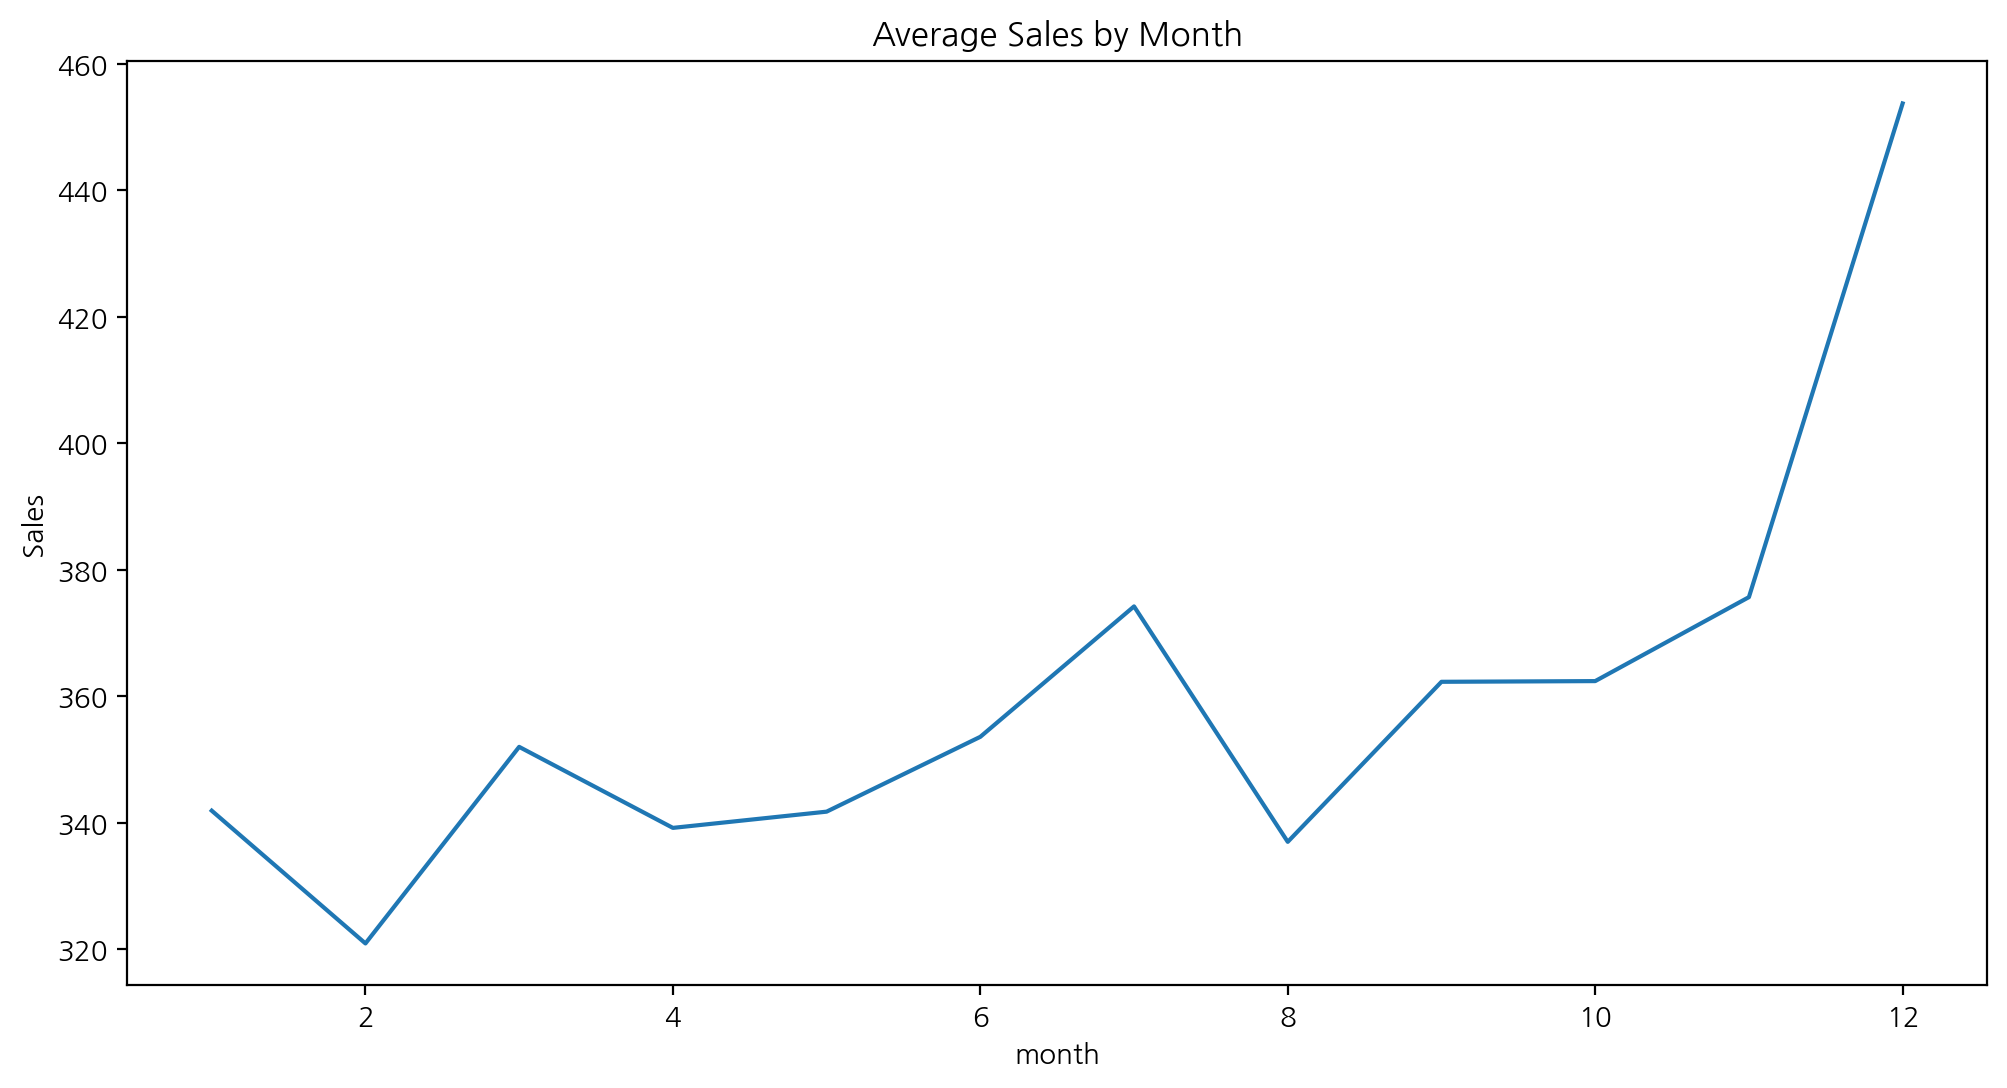

In [37]:
plt.figure(figsize=(12,6))

plt.plot(df_month_s['month'], df_month_s['sales'])

plt.xlabel('month')
plt.ylabel('Sales')
plt.title('Average Sales by Month')

Text(0.5, 1.0, 'Average Sales by Year')

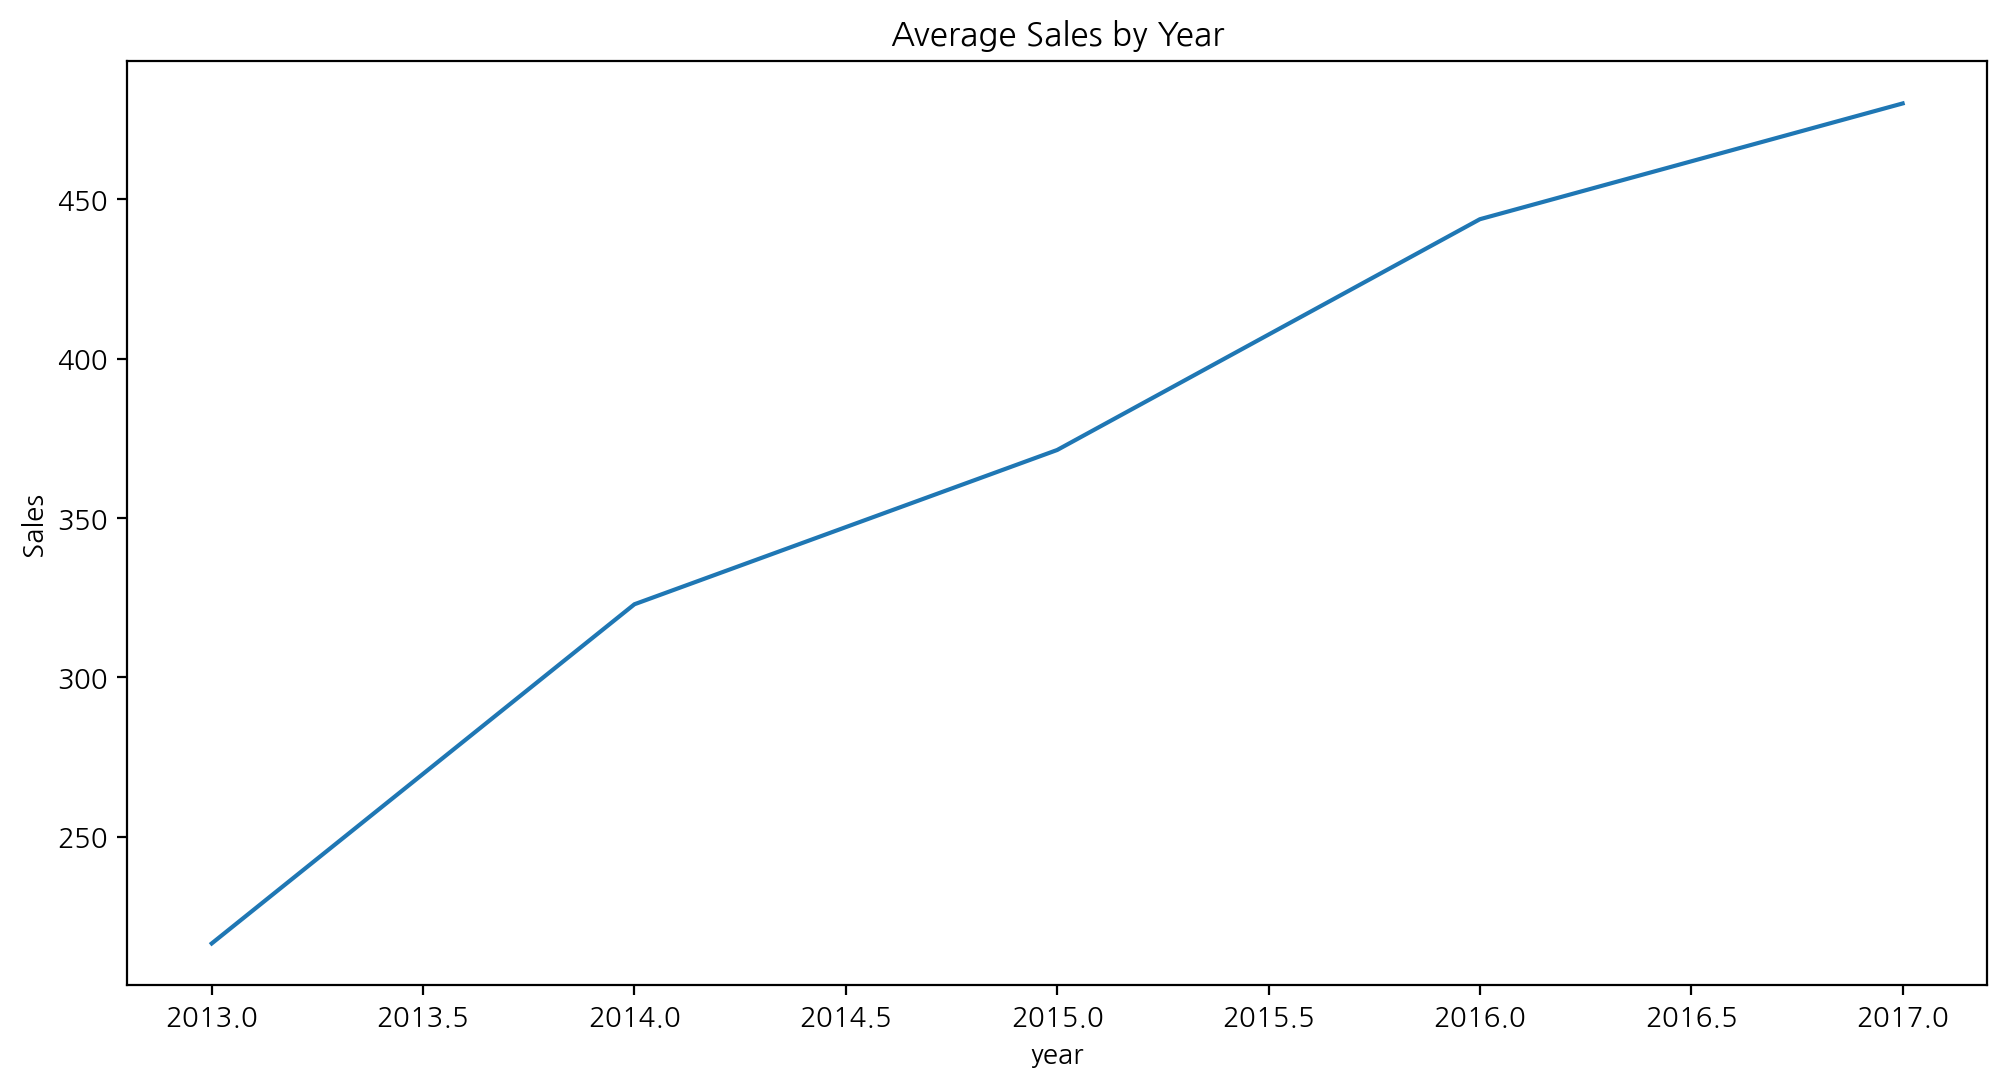

In [38]:
plt.figure(figsize=(12,6))

plt.plot(df_year_s['year'], df_year_s['sales'])

plt.xlabel('year')
plt.ylabel('Sales')
plt.title('Average Sales by Year')

In [39]:
train_a = train[['date', 'sales']].groupby('date').mean().reset_index()
train_a

,date,sales
0,2013-01-01,1.409438
1,2013-01-02,278.390807
2,2013-01-03,202.840197
3,2013-01-04,198.911154
4,2013-01-05,267.873244
...,...,...
1679,2017-08-11,463.733851
1680,2017-08-12,444.798280
1681,2017-08-13,485.768618
1682,2017-08-14,427.004717


Text(0.5, 1.0, 'Average Sales by Date')

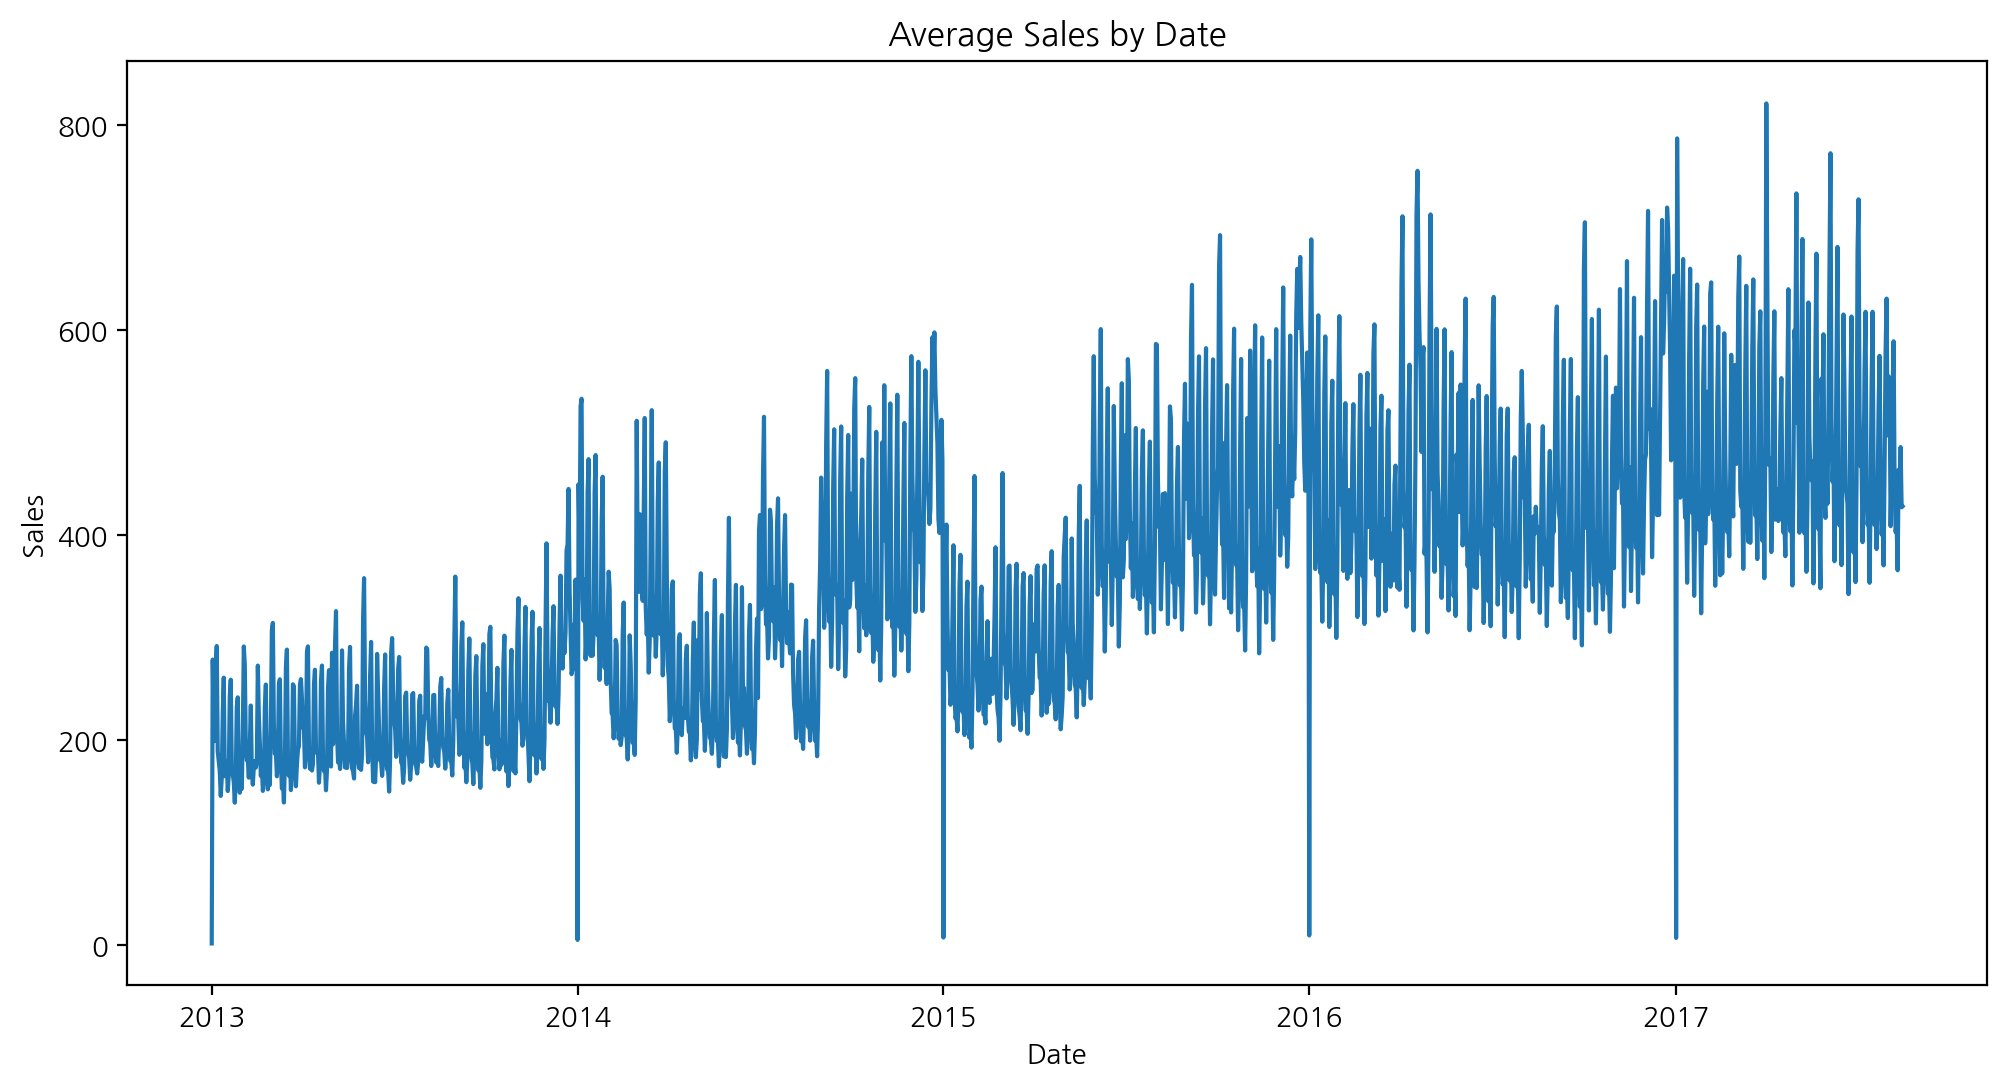

In [40]:
plt.figure(figsize=(12,6))

plt.plot(train_a['date'], train_a['sales'])

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Average Sales by Date')

In [41]:
import plotly.graph_objs as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_a['date'], y=train_a['sales'], mode='lines'))
fig.show()

- 판매의 증가 추세.
- 최근 2년 동안(2015년 7월 이후) 추세는 안정적이었습니다(거의 정지된 TS).
- 줌인을 하면 7일마다 같은 패턴의 계절성이 있다는 것을 알 수 있습니다(주말에는 매출이 증가합니다). 주간 계절성의 절정은 일요일/토요일입니다.
- 매년 1월 1일은 슈퍼마켓이 문을 열지 않습니다(매출=0).

In [42]:
fig = go.Figure(data=[go.Table(header=dict(values=['KPI', 'Value']),
                 cells=dict(values=[['Number of Stores', 'Number of Different Products', 
                                     'Window Start Date', 'Window End Date',
                                    '#Rows in training set', '#Date Points in Train Dataset'], 
                                    [train['store_nbr'].nunique(), train['family'].nunique(), 
                                     train['date'].min(), train['date'].max(),
                                    train.shape[0], train['date'].nunique()]]))
                     ])

fig.update_layout({"title": f'BASIC KPIS of TRAIN DATA'}, height=500, width=500)
fig.show()

- 판촉 활동과 판매 단위 사이에는 양의 상관 관계가 있습니다. 
- 따라서, 슈퍼마켓의 더 많은 품목들이 판촉 활동을 할 때, 그것들은 더 많이 팔릴 가능성이 있습니다. 
- 일부 품목의 가격 탄력성이 높고, 여름철 시장에서 일부 품목의 수요는 품목 가격 변동과 상관관계가 높다는 뜻입니다.
- 탄력성이 높은 패밀리 제품은 무엇입니까? 저는 페이버리타 슈퍼마켓의 데이터 과학자가 그 분석을 했다고 생각합니다. 
- 그들은 수익을 극대화함으로써 어떤 제품이 가격 변화에 더 민감한지를 결정했습니다.

In [43]:
oil

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


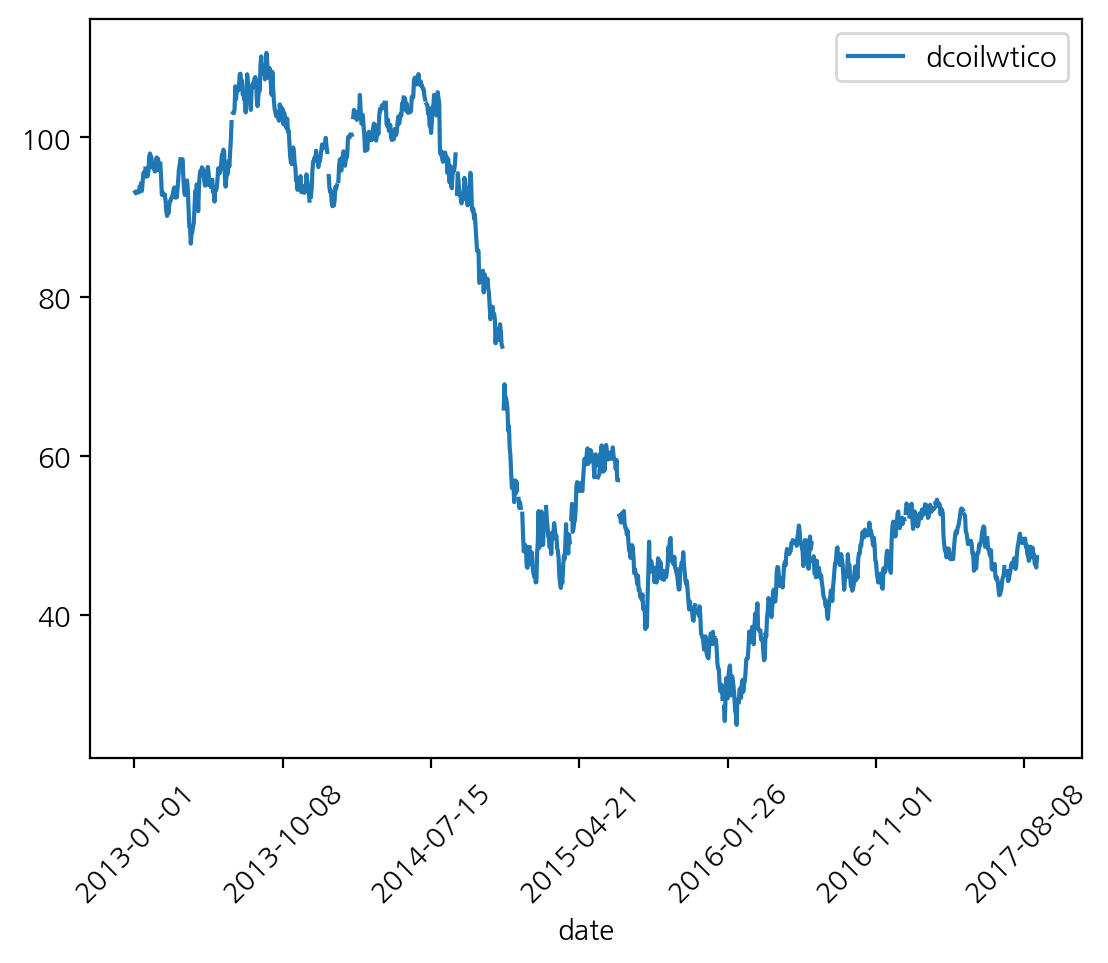

In [44]:
oil.plot(rot=45);

Text(0.5, 1.0, '날짜별 유가')

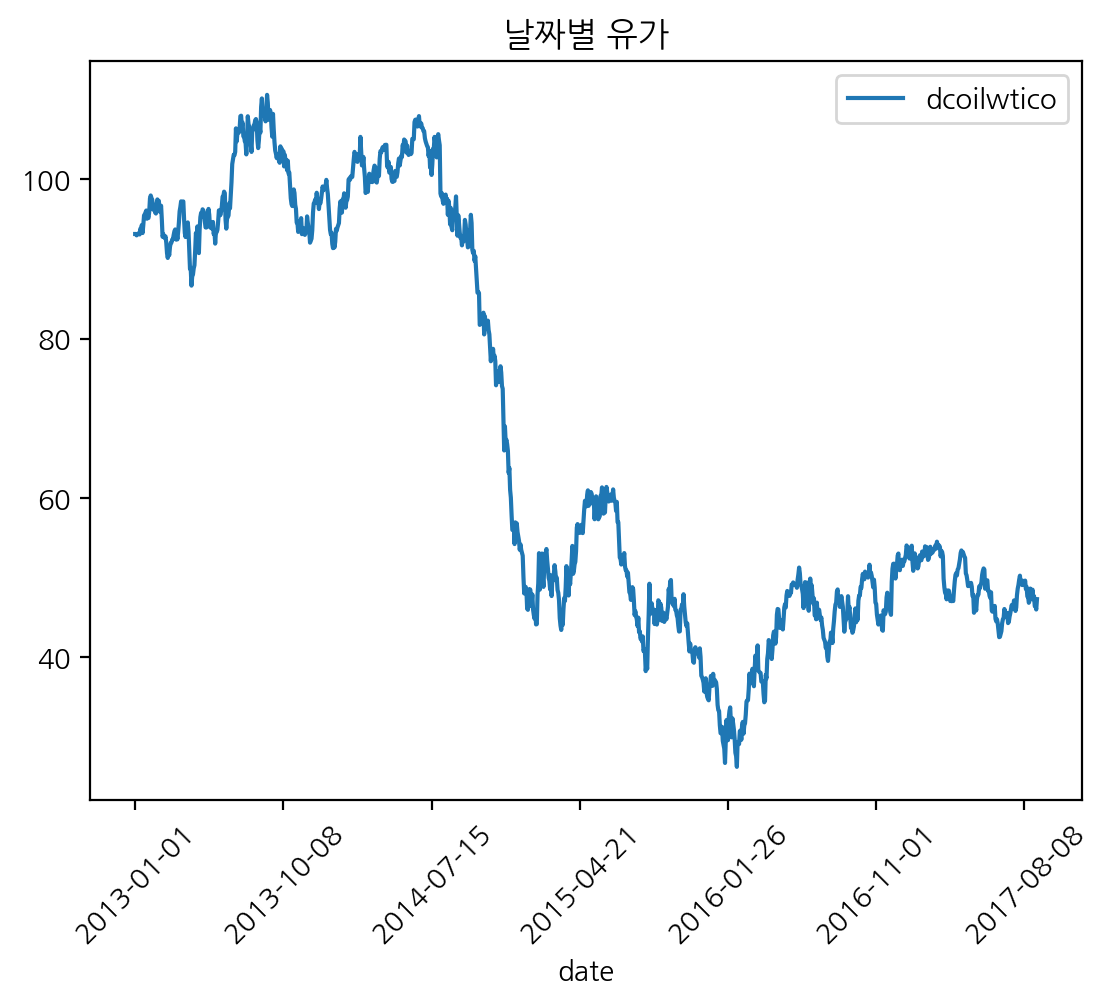

In [45]:
# 선형 보간법으로 결측치 채우기
oil = oil.interpolate(method='linear')
oil.iloc[0] = oil.iloc[1]
oil.plot(rot=45);
plt.title('날짜별 유가')

In [46]:
holidays_events.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [47]:
holidays_events['date'] = pd.to_datetime(holidays_events['date']) 
holidays_events['year'] = holidays_events['date'].dt.year  
holidays_events['month'] = holidays_events['date'].dt.month  
holidays_events['day'] = holidays_events['date'].dt.day 
holidays_events['day_of_week'] = pd.to_datetime(holidays_events['date']).dt.strftime('%A')

In [48]:
holidays_events = holidays_events.drop(['index'],axis=1).reset_index(drop=False).set_index('date')
holidays_events.head()

KeyError: "['index'] not found in axis"

In [ ]:
holidays_events['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [ ]:
holidays_events = holidays_events[holidays_events['type']!='Work Day']
holidays_events['month']

date
2012-03-02     3
2012-04-01     4
2012-04-12     4
2012-04-14     4
2012-04-21     4
              ..
2017-12-22    12
2017-12-23    12
2017-12-24    12
2017-12-25    12
2017-12-26    12
Name: month, Length: 345, dtype: int64

Text(0.5, 1.0, '월별 공휴일 count')

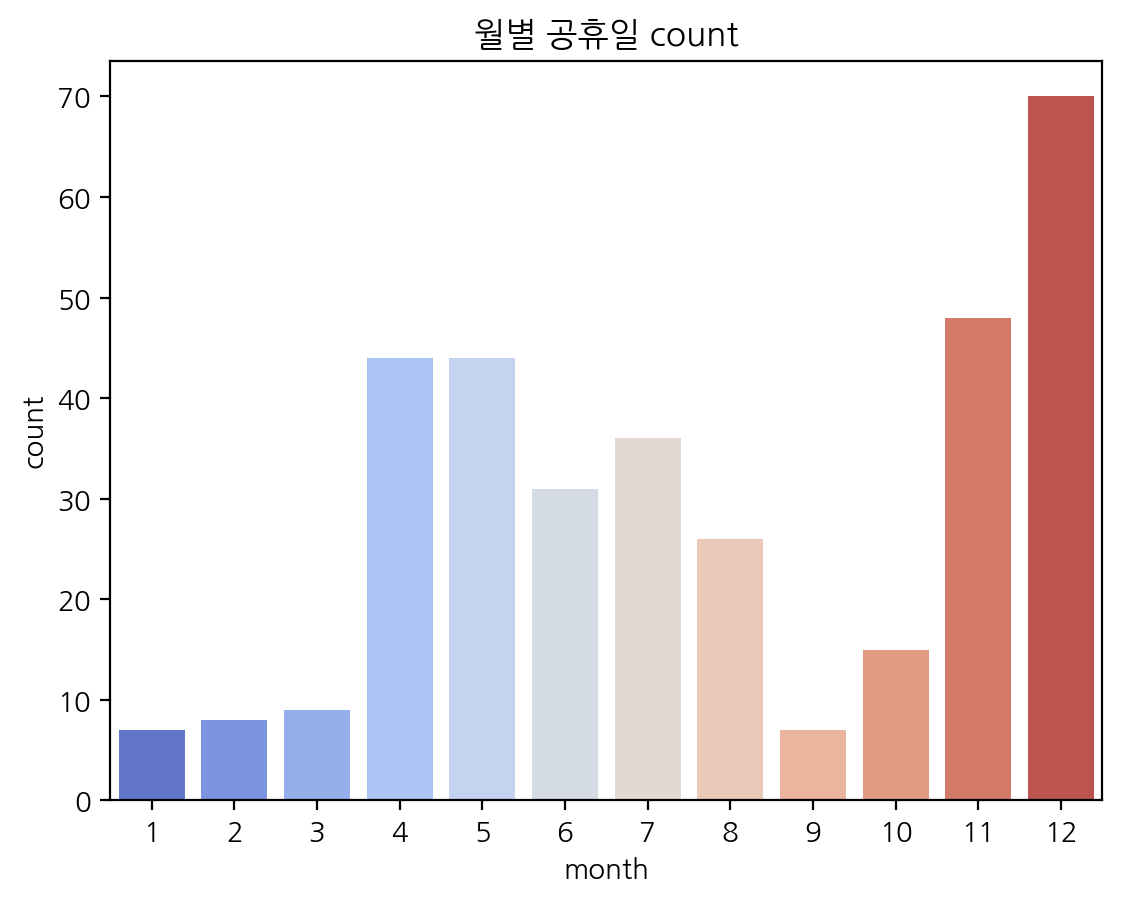

In [ ]:
sns.countplot(data=holidays_events, x='month', palette='coolwarm')
plt.title('월별 공휴일 count')

Text(0.5, 1.0, '연도별 공휴일 count')

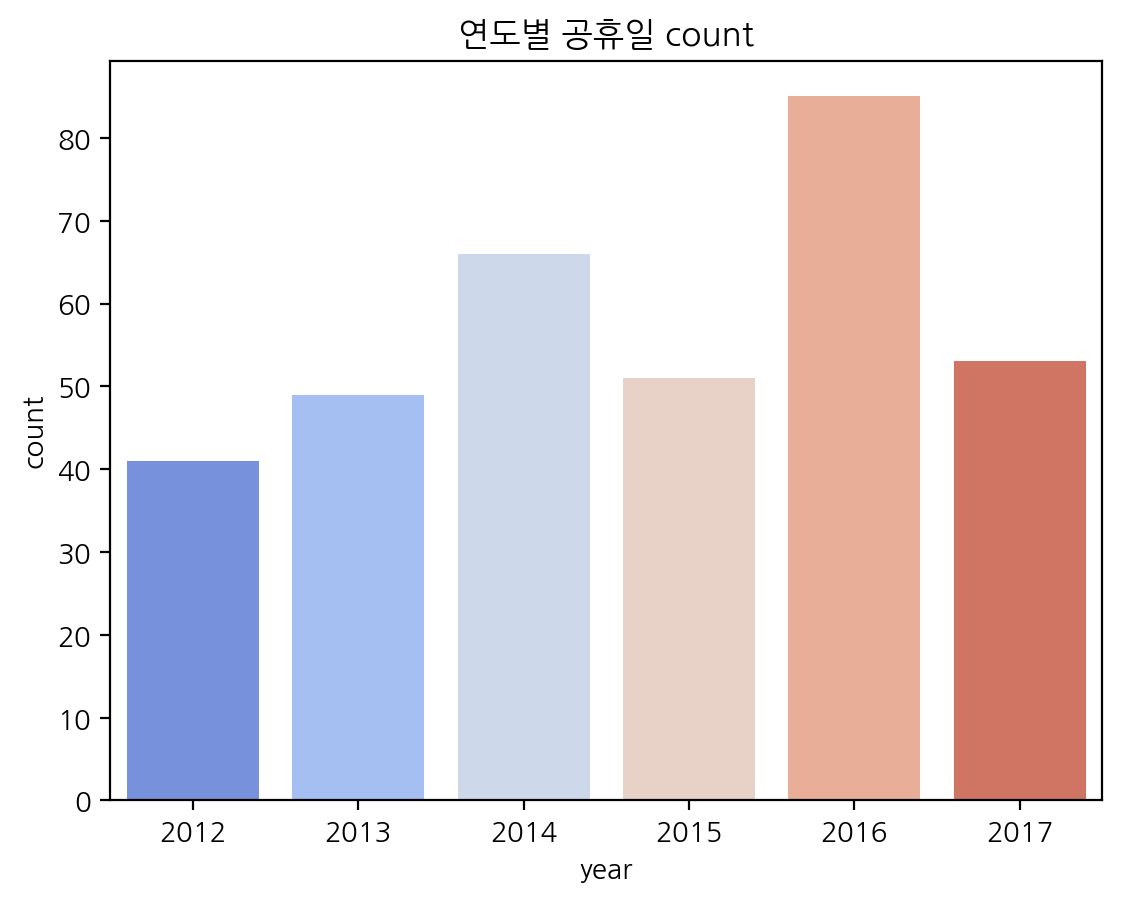

In [ ]:
sns.countplot(data=holidays_events, x='year', palette='coolwarm')
plt.title('연도별 공휴일 count')

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

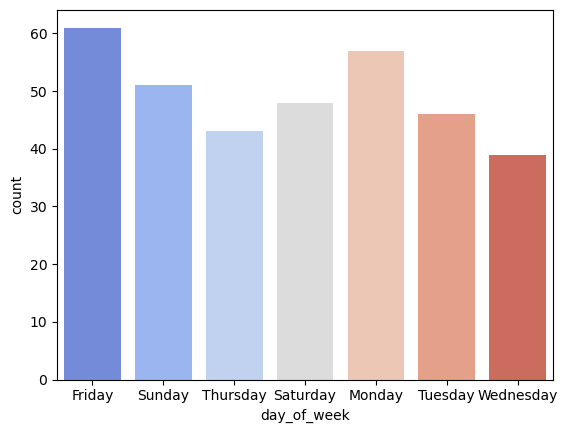

In [ ]:
sns.countplot(data=holidays_events, x='day_of_week', palette='coolwarm')

In [ ]:
train.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
train[(train['store_nbr']==54)&(train['sales']!=0.0)].head(1)

,date,store_nbr,family,sales,onpromotion
id,,,,,
3399,2013-01-02,54,AUTOMOTIVE,5.0,0


In [ ]:
# 1~19. 2013-01-02
# 20. 2015-02-13
# 21. 2015-07-24
# 22. 2015-10-09
# 23. 2013-01-02
# 25. 2013-01-01
# 29. 2015-03-20
# 36. 2013-05-09
# 42. 2015-08-21
# 52. 2017-04-20
# 53. 2014-05-29


In [ ]:
train['family'].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [81]:
train[(train['family']=='SEAFOOD')&(train['sales']!=0.0)].head(1)

,date,store_nbr,family,sales,onpromotion,year,month,day,day_of_week
id,,,,,,,,,
1814,2013-01-02,1,SEAFOOD,38.029,0,2013,1,2,Wednesday


In [ ]:
'AUTOMOTIVE', 2013-01-02
'BABY CARE', 2014-03-01
'BEAUTY', 2013-01-01
'BEVERAGES', 2013-01-01
'BOOKS',2016-10-08
'BREAD/BAKERY', 2013-01-01
'CELEBRATION', 	2014-01-01
'CLEANING', 2013-01-01
'DAIRY', 2013-01-01
'DELI', 
'EGGS',
'FROZEN FOODS', 
'GROCERY I', 
'GROCERY II', 
'HARDWARE',2013-01-02
'HOME AND KITCHEN I', 2014-01-01
'HOME AND KITCHEN II', 2014-01-01
'HOME APPLIANCES', 	2013-01-02	
'HOME CARE', 	2014-01-01	
'LADIESWEAR', 	2014-01-02	
'LAWN AND GARDEN', 2013-01-01	
'LINGERIE', 2013-01-01
'LIQUOR,WINE,BEER', 2013-01-01
'MAGAZINES', 	2014-01-01	
'MEATS', 2013-01-01
'PERSONAL CARE', 2013-01-01
'PET SUPPLIES', 2014-01-01
'PLAYERS AND ELECTRONICS', 2014-01-01
'POULTRY', 2013-01-01
'PREPARED FOODS', 	2013-01-01	
'PRODUCE', 2013-03-16	
'SCHOOL AND OFFICE SUPPLIES', 2014-01-02	
'SEAFOOD' 2013-01-02	

In [119]:
average_sales = (
    train
    .groupby('date').mean()
    .squeeze()
    .loc['2017']
)

In [146]:
average_sales = average_sales[average_sales.index!='2017-01-01']

<AxesSubplot:xlabel='date'>

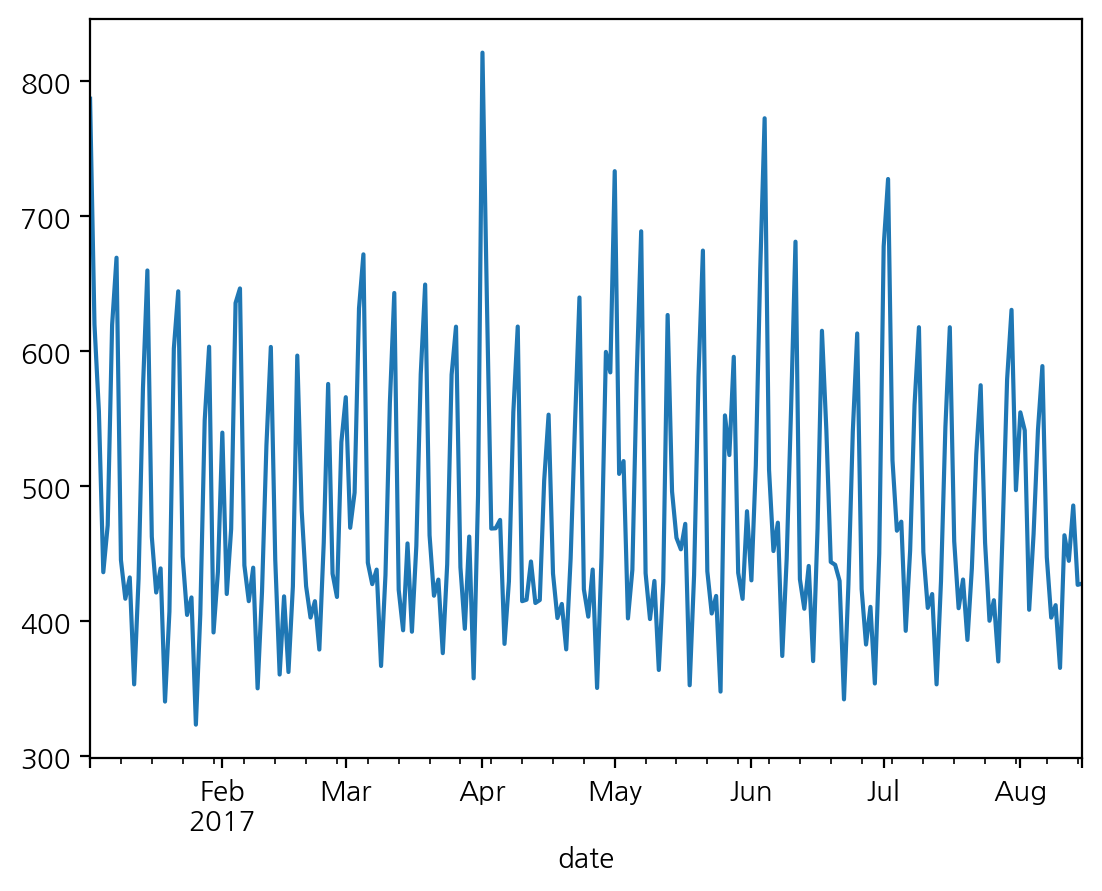

In [147]:
average_sales['sales'].plot()